In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import os
import numpy as np


In [ ]:
df = pd.read_csv(r'C:\Laiba\Uni\5th Sem\TBW\Ionospheric-foF2-Modeling-ANN-ML-IRI\Fof2 Data\preprocessed_fof2_csvs\FINAL_MASTER.csv')
print("Shape of the loaded Data:", df.shape)

Shape of the loaded Data: (37035, 7)


In [21]:
df.head()

,DayOfYear,Hour,foF2,Longitude,Latitude,F10.7,Station
0,1,0,5.90,315.0,-22.7,69.5,CP
1,1,1,5.15,315.0,-22.7,69.5,CP
2,1,2,4.45,315.0,-22.7,69.5,CP
3,1,3,4.90,315.0,-22.7,69.5,CP
4,1,4,3.85,315.0,-22.7,69.5,CP


In [22]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 DayOfYear    0
Hour         0
foF2         0
Longitude    0
Latitude     0
F10.7        0
Station      0
dtype: int64


In [23]:
x = df.drop(['foF2', 'Station'], axis=1)
y = df['foF2']

In [24]:
x.head()

,DayOfYear,Hour,Longitude,Latitude,F10.7
0,1,0,315.0,-22.7,69.5
1,1,1,315.0,-22.7,69.5
2,1,2,315.0,-22.7,69.5
3,1,3,315.0,-22.7,69.5
4,1,4,315.0,-22.7,69.5


In [25]:
y.head()

0    5.90
1    5.15
2    4.45
3    4.90
4    3.85
Name: foF2, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(x_test)

In [29]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 2.2245344438781065
R² Score: 0.3540968587614236


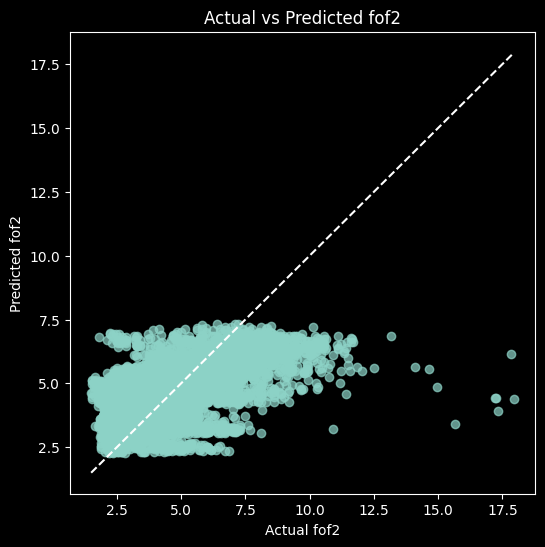

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='white', linestyle='--')
plt.xlabel("Actual fof2")
plt.ylabel("Predicted fof2")
plt.title("Actual vs Predicted fof2")
plt.show()


In [32]:
print("\nModel Coefficients:")
for col, coef in zip(x.columns, model.coef_):
    print(f"{col}: {coef:.4f}")

print("Intercept:", model.intercept_)


Model Coefficients:
DayOfYear: 0.0009
Hour: 0.1243
Longitude: -0.0191
Latitude: -0.0340
F10.7: 0.0019
Intercept: 9.07637545874811


In [36]:
# Saving the model
joblib.dump(model, 'fof2_linear_model.pkl')
print("Model saved as fof2_linear_model.pkl")

Model saved as fof2_linear_model.pkl


## Training Model on each CSV

In [46]:
model = joblib.load(r"C:\Laiba\Uni\5th Sem\TBW\TBW Project\ML\fof2_linear_model.pkl")


Region: CP_2019_merged
MSE: 4.7070
R² Score: 0.2726


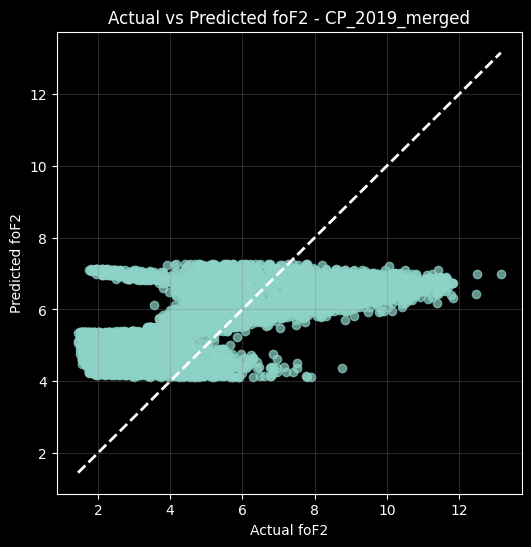


Region: ElginAB_2019_merged
MSE: 1.2168
R² Score: 0.0494


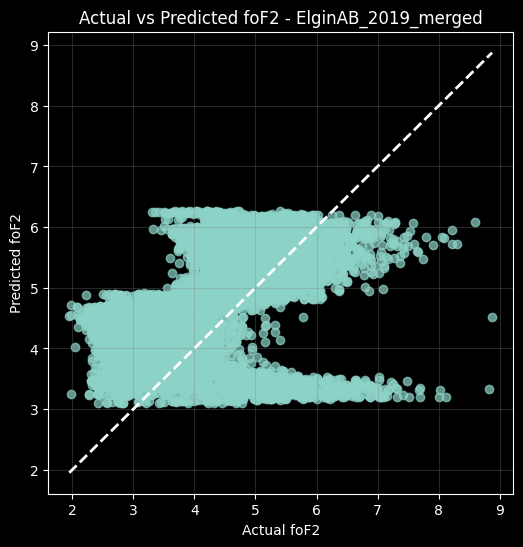


Region: Jicamarca_2019_merged
MSE: 2.2432
R² Score: 0.1304


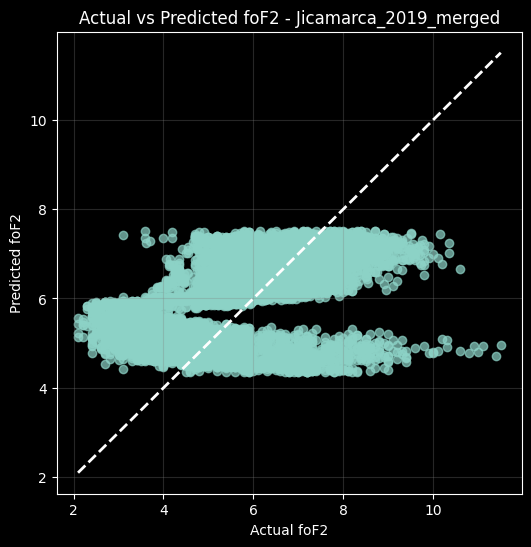


Region: MilstonHill_2019_merged
MSE: 1.0676
R² Score: 0.1847


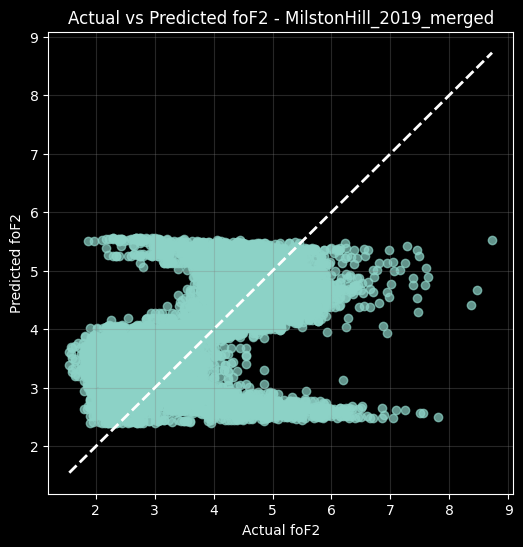


Region: Ramey_2019_merged
MSE: 2.5986
R² Score: 0.3037


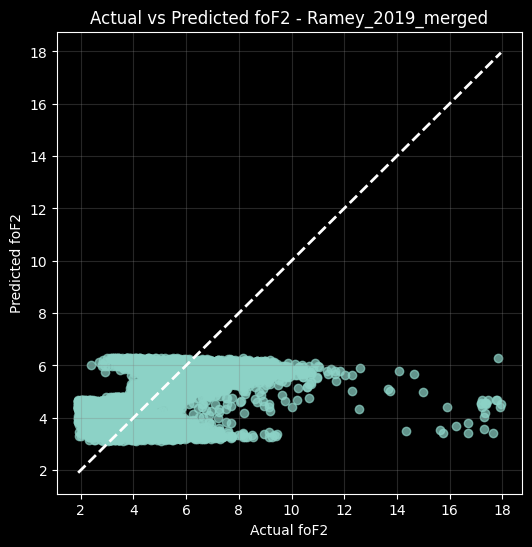

In [ ]:
# Folder with merged regional CSVs
merged_folder = r"C:\Laiba\Uni\5th Sem\TBW\Ionospheric-foF2-Modeling-ANN-ML-IRI\Fof2 Data\Regional_Dataset_F107"

# Features used in the model
features = ['DayOfYear','Hour','Longitude', 'Latitude', 'F10.7']

# Loop over each regional CSV
for csv_file in os.listdir(merged_folder):
    if csv_file.endswith(".csv"):
        region_name = os.path.splitext(csv_file)[0]
        csv_path = os.path.join(merged_folder, csv_file)

        df = pd.read_csv(csv_path)

        X = df[features]
        y_actual = df['foF2']

        y_pred = model.predict(X)

        mse = mean_squared_error(y_actual, y_pred)
        r2 = r2_score(y_actual, y_pred)
        print(f"\nRegion: {region_name}")
        print(f"MSE: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")

        plt.figure(figsize=(6,6))
        plt.style.use('dark_background')
        plt.scatter(y_actual, y_pred, alpha=0.7)
        plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 
                 color='white', linestyle='--', linewidth=2)
        plt.xlabel("Actual foF2")
        plt.ylabel("Predicted foF2")
        plt.title(f"Actual vs Predicted foF2 - {region_name}")
        plt.grid(True, color='gray', alpha=0.3)
        plt.show()


Region: CP_2019_merged
MSE: 4.0537
R² Score: 0.3445


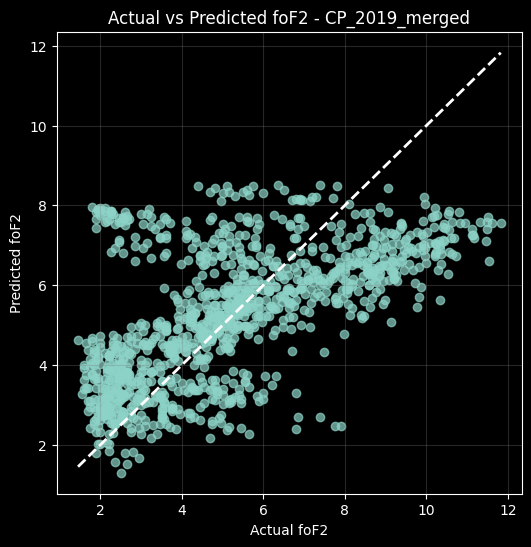


Region: ElginAB_2019_merged
MSE: 0.9338
R² Score: 0.2552


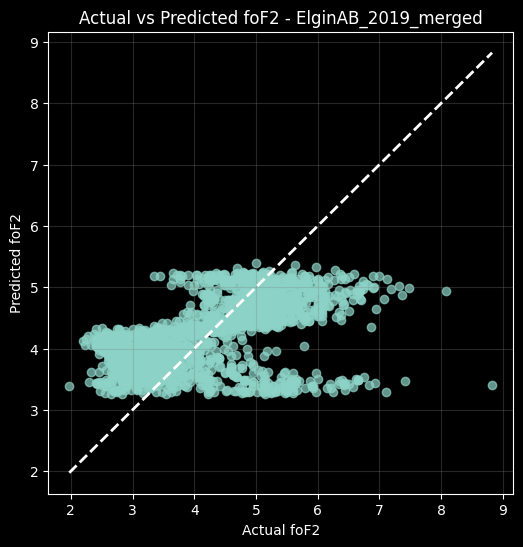


Region: Jicamarca_2019_merged
MSE: 2.1037
R² Score: 0.1875


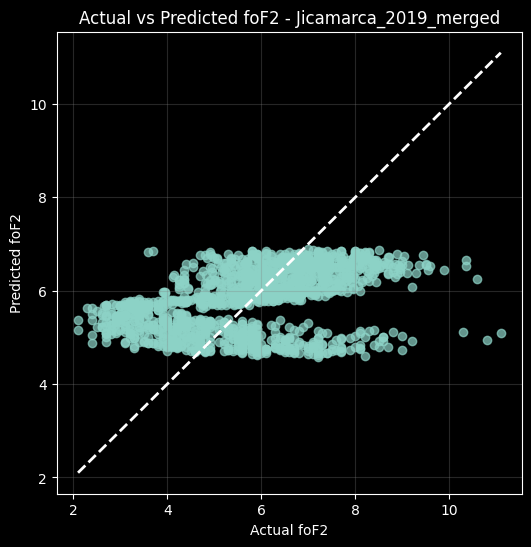


Region: MilstonHill_2019_merged
MSE: 0.8744
R² Score: 0.2941


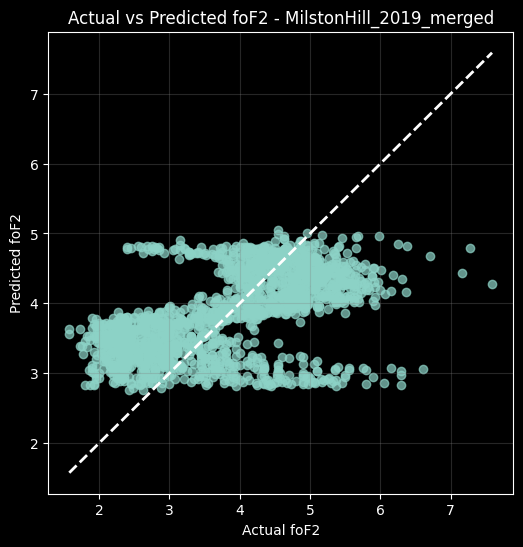


Region: Ramey_2019_merged
MSE: 2.5366
R² Score: 0.3328


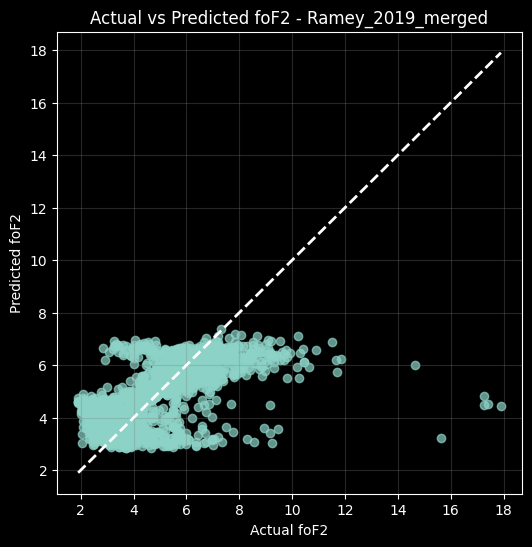

In [53]:
for csv_file in os.listdir(merged_folder):
    if csv_file.endswith(".csv"):
        region_name = os.path.splitext(csv_file)[0]
        csv_path = os.path.join(merged_folder, csv_file)
                                
        df = pd.read_csv(csv_path)

        X = df[['DayOfYear','Hour','F10.7']]  # Drop Latitude and Longitude
        y = df['foF2']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\nRegion: {region_name}")
        print(f"MSE: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")

        plt.figure(figsize=(6,6))
        plt.style.use('dark_background')
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 color='white', linestyle='--', linewidth=2)
        plt.xlabel("Actual foF2")
        plt.ylabel("Predicted foF2")
        plt.title(f"Actual vs Predicted foF2 - {region_name}")
        plt.grid(True, color='gray', alpha=0.3)
        plt.show()